# Generate Birth-Death Rates for a Folder of Initial Conditions 
Tim Tyree<br>
8.13.2020<br>

- DONE: get folder of filenames interactively
- TODO: for a given file_name (absolute path), generate a birth-death rates file  
    - init_filesystem_bd(base_folder)
    - run routine, ironing out the bugs as they happen

In [1]:
#pylab
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
# from pylab import imshow, show
import time
# import skimage as sk
# from skimage import measure, filters

# import matplotlib.pyplot as plt, numpy as np, os
# from numba import njit, jit, vectorize
# from PIL import Image
# import imageio

#automate the boring stuff
from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()

import dask.bag as db

#load the libraries
from lib import *
from lib.birth_death_rates_from_ic import *
# from lib.chunk_ic import chunk_600x600_from_fn

#load the measure library for robust, simplified, fast tip detection
from lib.measure import find_contours
from lib.measure._utils_find_contours import *
from lib.measure._utils_find_tips import *
from lib.measure._find_tips import *


%autocall 1
%load_ext autoreload
%autoreload 2

100000
Automatic calling is: Smart


# get folder of chunked initial condition filenames interactively

In [2]:
#get input_fn_list interactively
#TODO: select only files that match the extension of the one selected.
#find file interactively
print("please select a file from within the desired folder.")
file = search_for_file()

please select a file from within the desired folder.


In [2]:
#ic1 file = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ic-in/ic_200x200.121.33.npz'
# ic2 
file = '/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ic-in/ic_200x200.001.11.npz'


In [3]:
#get a list of all files
#change to the directory containing file
folder_name = os.path.dirname(file)
os.chdir(folder_name)

# get all ic files that are in the current working directory that are not .csv's
retval = !ls
file_name_list = list(retval)
# check each file if it ends in .csv before merging it
def is_csv(file_name):
    return file_name[-4:]=='.csv'
file_name_list = [f for f in file_name_list if not is_csv(f)]
cwd = os.getcwd()
input_fn_list = ['/'.join((cwd,fn)) for fn in file_name_list]
print(f"Number of files in input_fn_list is {len(input_fn_list)}.")

Number of files in input_fn_list is 171.


In [4]:
#initialize filesystem if not already initialized
base_folder   = '/'+os.path.join(*cwd.split('/')[:-1])
try:
    init_filesystem_bd(base_folder)
except FileExistsError:
    print('new file system not initialized.')

## DONE for a given file_name, generate a birth-death rates file  
    - DONE: init_filesystem_bd(base_folder)
    - DONE: run routine, ironing out the bugs as they happen

In [6]:
# file_name = os.path.abspath(input_fn_list[0])
input_fn = input_fn_list[0]

In [7]:
# TODO: run routine, ironing out the bugs as they happen
#what's the first steps to this?

In [14]:
birth_death_rates_from_ic(ic=input_fn)

KeyboardInterrupt: 

In [1]:
print(123)

123


# for the list of file names in a given folder, simulate all of them using dask

In [5]:
print(f"we're about to obliterate {len(input_fn_list)} distinct initial conditions.")

we're about to obliterate 171 distinct initial conditions.


In [6]:
# !pip install dask
# !pip install "dask[utils]" --upgrade
# !pip install "dask[distributed]" --upgrade
# from lib.birth_death_rates_from_ic import *

# #make sure the max_time is large enough
# print(f"""
# 1 partition of my GPU serves {114 / (1*24)} trials per hour, on average.  
# Here we consider 2D spiral defect chaos randomized initial conditions
# that each evolve in time via GPU and each worker observe spiral tip locations via CPU.
# """)
# #TODO: check validity of result

#TODO: get concurrent kernels kranking
#TODO: try basic dask workers/daskbag workers on handling each of these of these kernels in concurrent asynchrony.
#TODO: get all tasks to work on GPU
#TODO: minimize data transfers

In [7]:
# from lib.tip_log_from_ic import *
# from lib.birth_death_rates_from_ic import generate_tip_logs, birth_death_rates_from_ic
#TODO: see if this discards the trackpy logging but allows .log writing to work when logging = True and printing = True
# logger = logging.getLogger('my-logger')
# logger.propagate = False

# generate_tip_log_from_ic(input_file_name, nsteps=10**3)

In [8]:
# start = time.time()
# retval = [generate_tip_log_from_ic(input_file_name) for input_file_name in input_fn_list]
# print(f"run time for generating birth-death rates from file_name_list: {time.time()-start:.2f} seconds.")
# beep(3)


<function lib.routines.kwargs.get_kwargs(ic)>

In [2]:
# #slow CPU method that provides nonlocal topological information
# from lib.routines.kwargs import get_kwargs
# from lib.routines.generate_tip_logs import generate_tip_logs_from_ic
# get_kwargs
# def run_routine(ic):
#     kwargs = get_kwargs(ic)
#     kwargs = generate_tip_logs_from_ic(ic, **kwargs)
#     return True

In [6]:
from lib.routines.kwargs_cy import get_kwargs
from lib.routines.generate_tip_logs_cy import generate_tip_logs_from_ic
get_kwargs
def run_routine(ic):
    kwargs = get_kwargs(ic)
    kwargs = generate_tip_logs_from_ic(ic, **kwargs)
    return True

In [ ]:
#CPU spiral tips with GPU time steps
# b = db.from_sequence(input_fn_list, npartitions=1).map(generate_tip_log_from_ic)

#all CPU version
# b = db.from_sequence(input_fn_list, npartitions=7).map(birth_death_rates_from_ic)
b = db.from_sequence(input_fn_list, npartitions=7).map(run_routine)

start = time.time()
retval = list(b)
print(f"run time for generating birth-death rates from file_name_list: {time.time()-start:.2f} seconds.")
beep(3)

In [17]:
print('''LOOKING at the effect of padding:''')
print('runtime A = 8 hours. padding = 10, edge_tol = 5, atol = 1e-10')
print(f'halving the padding to the original took runtime B = {27100//60//60:.2f} hours, all else equal/caeteris paribus.')
print('the termination times were exactly the same, which is to be expected.')
print('however, the number of birth-death events went from ~2994 to 6926.  Oh my!  This suggests that the false tips are from the padding method.  Perhaps, it is from the blur function...')
print('''\Hypothesis: the source of error from padding is isolated to the call to measure.find_contours.  
    Check this by getting the source of the implementation, explicitely forcing it to obey periodic boundary conditions, and then retrying.  IF it works, consider semi-optimizing it with numba.njit, then maybe with numba.cuda, but goodness not with pycuda.''')

print('''\nAlternative Test: check the dependency of birth death events for edge_tol = 20, padding = 21, overnight.  This should take ~8 hours anyway, and it's late... 
''')
print(f'doubling the padding to the original took runtime B = {30850//60//60:.2f} hours, all else equal/caeteris paribus.')
print('Im getting the same number of birth deaths as in the padding=5 case.  This suggests the problem is not in the padding.')



Two parameters were switched in WJ's time step that led to the termination time increasing by approximately 1 order of magnitude.  tau_v1 and tau_v2.

In [10]:
print(f"giving jupyter 10GB of ram and more modestly expensive parameter settings, my ultrabook can run {6/(49):.3f} trials per minute..")

print(f"giving jupyter its default ram and more more computationally expensive parameter settings, my ultrabook can run {171/(9+2*60):.3f} trials per minute..")
print(type(retval[0]))
print ( len (retval))
#recording every 10 frames, pad = 20, h= 0.1 ms, D = 0.0005 cm^2/ms 

giving jupyter 10GB of ram and more modestly expensive parameter settings, my ultrabook can run 0.122 trials per minute..
giving jupyter its default ram and more more computationally expensive parameter settings, my ultrabook can run 1.326 trials per minute..
<class 'float'>
100000


In [12]:
print(f"giving jupyter 10GB of ram, my ultrabook can run {171/39:7f} trials per minute.  Damn!")

giving jupyter 10GB my ultrabook can run 4.384615 trials per minute.  Damn!


In [13]:
print(f"giving jupyter 60GB of ram, my ultrabook can run {145/38:7f} trials per minute.  Damn!")

giving jupyter 60GB of ram, my ultrabook can run 3.815789 trials per minute.  Damn!


# troubleshooting

## testing the routine on 1 file from the folder

In [11]:
initial_condition_dir = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ic-in/ic_200x200.121.33.npz'
file = initial_condition_dir

In [7]:
kwargs = get_kwargs(file)

In [10]:
kwargs['beeping'] = True
kwargs['asserting'] = True
kwargs['plotting'] = True
kwargs['printing'] = True
kwargs['nsteps'] = 10**4

loading initial conditions from: 
	/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ic-in/ic_200x200.121.33.npz.
changed directory to save_folder: 
	/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ds_5_param_set_8/Log.


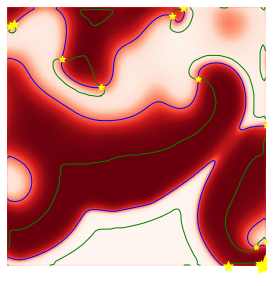

sigma is 1.5, threshold is 0.6.
pad is 5, rejection_distance is edge_tolerance is 3.
starting simulation.  integrating no further than time 1000.000 milliseconds.
Progress: |██████████████████████████████████████████████████| 100.0% Complete
❤

time integration complete. run time was 95.22 seconds in realtime
current time is 1000.0 ms in simulation time.
number of nan pixel voltages is 0.
saved to:
/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ds_5_param_set_8/Log/ic_200x200.121.33_ds_5_sigma_1.5_threshold_0.6_log.csv


In [11]:
tip_log_dir, kwargs      = generate_tip_logs(initial_condition_dir=file, **kwargs)

In [13]:
tip_position_dir = postprocess_tip_logs(tip_log_dir, **kwargs)

True it is that the file to be post processed exists,
and the resulting "_processed.csv" was supplanted herein:
	/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ds_5_param_set_8/Log/ic_200x200.121.33_ds_5_sigma_1.5_threshold_0.6_processed.csv


In [14]:
data_fn_trajectories     = track_tip_trajectories(tip_position_dir, **kwargs)

loading .csv of size [?? 428 KB ??] from 
	/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ds_5_param_set_8/Log/ic_200x200.121.33_ds_5_sigma_1.5_threshold_0.6_processed.csv
files will be saved in the folder: 
	/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ds_5_param_set_8/trajectories
data_df_traj: ic_200x200.121.33_ds_5_sigma_1.5_threshold_0.6_sr_50_mem_2_traj.csv


loading trajectories from data_fn_traj: ic_200x200.121.33_ds_5_sigma_1.5_threshold_0.6_sr_50_mem_2_traj.csv.
birth death rates successfully saved in: ic_200x200.121.33_ds_5_sigma_1.5_threshold_0.6_sr_50_mem_2_tmin_100_LT_2_bdrates.csv


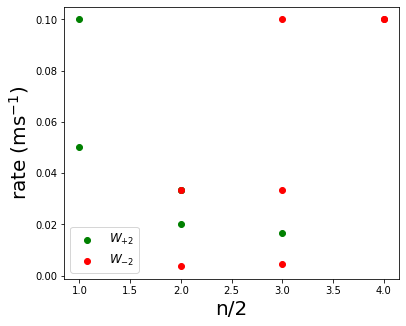

In [16]:
data_fn_bdrates  = compute_birth_death_rates(data_fn_trajectories, **kwargs)

In [14]:
from lib.birth_death_rates_from_ic import *
initial_condition_dir = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ic-in/ic_200x200.121.33.npz'
birth_death_rates_from_ic(initial_condition_dir)

Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x11cacc790>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/llvmlite/binding/executionengine.py", line 171, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):
KeyboardInterrupt: 


KeyboardInterrupt: 

## print kwargs

In [14]:
from lib.birth_death_rates_from_ic import _get_kwargs

In [15]:
_get_kwargs(file)

{'beeping': False,
 'asserting': False,
 'printing': True,
 'plotting': False,
 'logging': True,
 'sigma': 1.5,
 'threshold': 0.6,
 'V_threshold': 0.5,
 'edge_tolerance': 6,
 'pad': 10,
 'atol': 1e-10,
 'color_values': None,
 'h': 0.025,
 'nsteps': 10000000,
 'save_every_n_frames': 100,
 'max_time': 250000.0,
 'max_buffers_to_save': 0,
 'buffers_saved_counter': 0,
 'start_saving_buffers_at_step': 0,
 'timing': False,
 'recording_if_odd': True,
 'recording': True,
 'descrip': 'sigma_1.5_threshold_0.6',
 'save': True,
 'mem': 2,
 'sr': 10,
 'ds': 5,
 'tmin': 100,
 'LT_thresh': 0,
 'base_dir': '/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2',
 'base_save_dir': '/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8',
 'data_folder_bdrates': '/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8/birth-death-rates',
 'data_folder_traj': '/home/timothytyree/Documents

In [26]:
print(f"giving jupyter its default ram and these more computationally expensive parameter settings, my ultrabook can run {145/(33+21*60):.3f} trials per minute..")


giving jupyter its default ram and these more computationally expensive parameter settings, my ultrabook can run 0.112 trials per minute..


# TODO(later): for all input initial condition files in a folder, try generating the tip log with generate_tip_log_from_ic

In [2]:
from lib.tip_log_from_ic import *
%autocall 1
%load_ext autoreload
%autoreload 2

100000
Automatic calling is: Smart


'ic_200x200.005.21_log.csv'